In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets\\car_prices.csv")
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


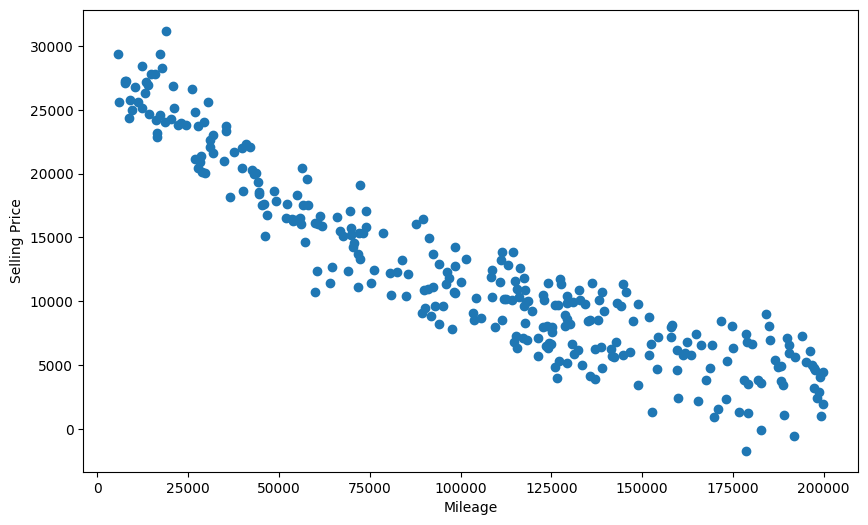

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(df["mileage"], df["selling_price"])
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X = df[["mileage"]]
y = df["selling_price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [7]:
X_train[:5], X_train_poly[:5]

(     mileage
 232   111081
 59    129358
 6      59886
 185   145546
 173   151779,
 array([[1.00000000e+00, 1.11081000e+05, 1.23389886e+10],
        [1.00000000e+00, 1.29358000e+05, 1.67334922e+10],
        [1.00000000e+00, 5.98860000e+04, 3.58633300e+09],
        [1.00000000e+00, 1.45546000e+05, 2.11836381e+10],
        [1.00000000e+00, 1.51779000e+05, 2.30368648e+10]]))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test_poly)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(4823730.839679536, 0.9157255575176676)

In [14]:
x_range = np.linspace(X["mileage"].min(), X["mileage"].max(),300).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


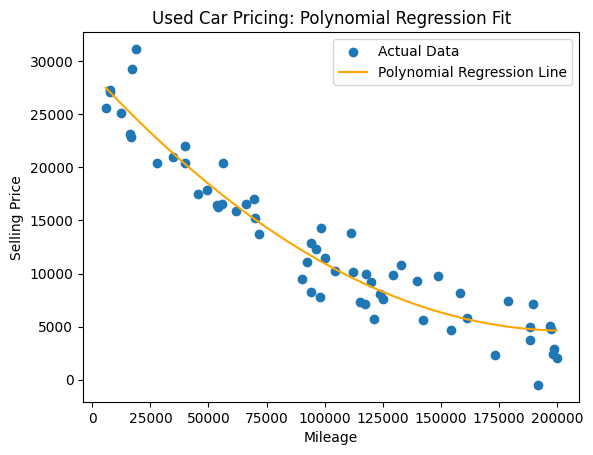

In [15]:
plt.scatter(X_test["mileage"], y_test, label="Actual Data")
plt.plot(x_range, y_range_pred, color="orange", label='Polynomial Regression Line')
plt.title("Used Car Pricing: Polynomial Regression Fit")
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.legend()
plt.show()